# Tuning forecaster

Skforecast library allows to combine grid search strategy with backtesting in order to identify the combination of lags and hyperparameters that achieve the best prediction performance.

## Libraries

In [8]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster

## Data

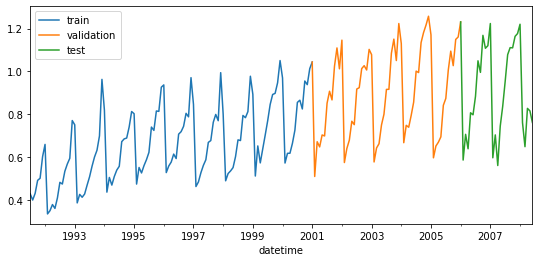

In [9]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 24
data_train = data.loc[: '2001-01-01']
data_val = data.loc['2001-01-01' : '2006-01-01']
data_test  = data.loc['2006-01-01':]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_val.plot(ax=ax, label='validation')
data_test.plot(ax=ax, label='test')
ax.legend();

## Grid search with time series cross-validation

In [10]:
# Grid search hyperparameter and lags
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 10 # Placeholder, the value will be overwritten
             )

# Regressor hyperparameters
param_grid = {'n_estimators': [50, 100],
              'max_depth': [5, 10, 15]}

# Lags used as predictors
lags_grid = [3, 10, [1, 2, 3, 20]]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = data.loc[:'2006-01-01'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = len(data_train),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
                )

Number of models compared: 18


loop lags_grid: 100%|███████████████████████████████████████| 3/3 [00:12<00:00,  4.25s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 50}
  Backtesting metric: 0.03344857370906804



In [11]:
results_grid

,lags,params,metric,max_depth,n_estimators
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 50}",0.033449,5,50
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 50}",0.039221,10,50
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 15, 'n_estimators': 100}",0.039266,15,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.039526,5,100
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.040241,10,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 15, 'n_estimators': 50}",0.040765,15,50
17,"[1, 2, 3, 20]","{'max_depth': 15, 'n_estimators': 100}",0.043909,15,100
13,"[1, 2, 3, 20]","{'max_depth': 5, 'n_estimators': 100}",0.044992,5,100
12,"[1, 2, 3, 20]","{'max_depth': 5, 'n_estimators': 50}",0.046224,5,50
0,"[1, 2, 3]","{'max_depth': 5, 'n_estimators': 50}",0.048666,5,50


In [12]:
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=5, n_estimators=50, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Window size: 10 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2006-01-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-03-12 12:04:23 
Last fit date: 2022-03-12 12:04:36 
Skforecast version: 0.4.3 

## Grid search with custom metric

`grid_search_forecaster()` allows using a custom function in order to calculate the metric.

In [13]:
def custom_metric(y_true, y_pred):
    '''
    Custom metric function
    '''
    metric = ((y_true - y_pred)/len(y_true)).mean()
    
    return metric


In [14]:

forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 10 # Placeholder, the value will be overwritten
             )

# Regressor hyperparameters
param_grid = {'n_estimators': [50, 100],
              'max_depth': [5, 10, 15]}

# Lags used as predictors
lags_grid = [3, 10, [1, 2, 3, 20]]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = data.loc[:'2006-01-01'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = True,
                        metric      = custom_metric,
                        initial_train_size = len(data_train),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
               )

Number of models compared: 18


loop lags_grid: 100%|███████████████████████████████████████| 3/3 [00:12<00:00,  4.11s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3] 
  Parameters: {'max_depth': 5, 'n_estimators': 50}
  Backtesting metric: 0.000264920074520459



In [15]:
%%html
<style>
.jupyter-wrapper .jp-CodeCell .jp-Cell-inputWrapper .jp-InputPrompt {display: none;}
</style>